Q1
ChatGPT log: https://chatgpt.com/share/66ef65b1-04cc-8008-9f08-bc4ced49e3bd
Log 2: https://chatgpt.com/share/66f31fd1-83b0-8008-a531-23796cfcc26e

In [26]:
import plotly.express as px
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [27]:
pingees.groupby('species')['flipper_length_mm'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,189.953642,6.539457,172.0,186.0,190.0,195.0,210.0
Chinstrap,68.0,195.823529,7.131894,178.0,191.0,196.0,201.0,212.0
Gentoo,123.0,217.186992,6.484976,203.0,212.0,216.0,221.0,231.0


In [361]:
# Group by species and calculate means and medians
pingees_group = pingees.groupby('species')['flipper_length_mm']
mean_data = pingees_group.mean().reset_index()
median_data = pingees_group.median().reset_index()
std_data = pingees_group.std().reset_index()

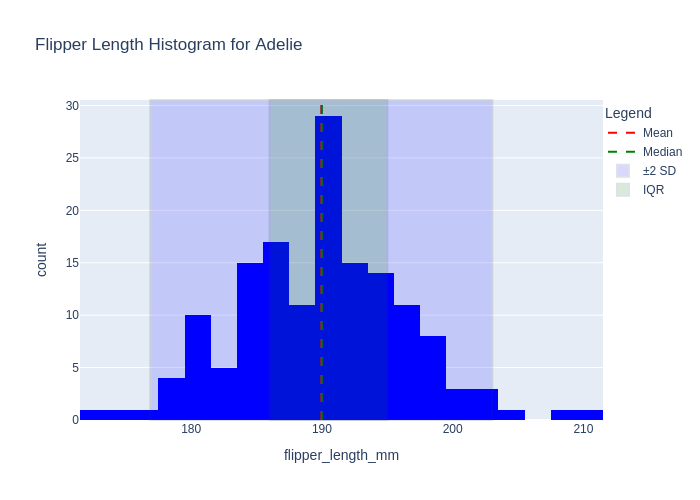

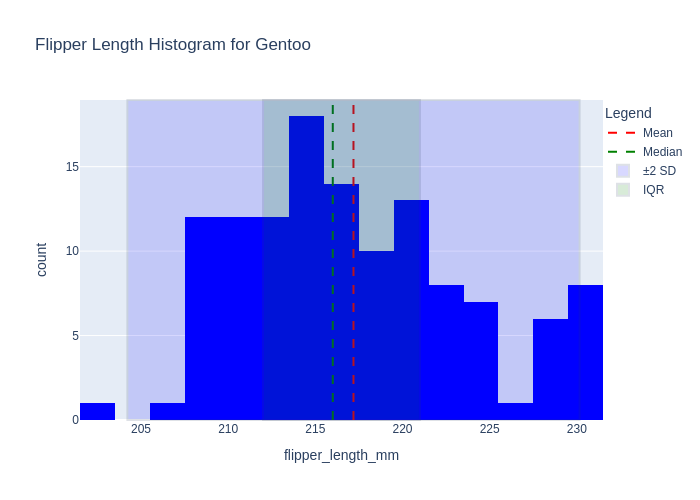

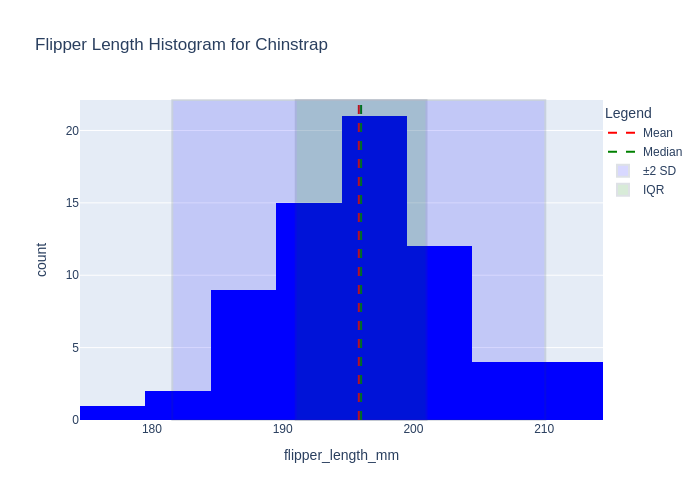

In [110]:
import pandas as pd
import plotly.express as px

# Load the penguins dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Group by species and calculate means, medians, and standard deviations
pingees_group = pingees.groupby('species')['flipper_length_mm']
mean_data = pingees_group.mean().reset_index()
median_data = pingees_group.median().reset_index()
std_data = pingees_group.std().reset_index()

# Get the species counts
pingees_count = pingees['species'].value_counts().reset_index()

# Loop through the species
for i in range(0, 3):
    species = pingees_count['species'][i]
    filtered_data = pingees[pingees['species'] == species]

    # Create the histogram
    fig = px.histogram(
        filtered_data, 
        x="flipper_length_mm", 
        title=f"Flipper Length Histogram for {species}",
        color_discrete_sequence=["blue"]
    )

    # Calculate mean and median
    mean_value = mean_data[mean_data['species'] == species]['flipper_length_mm'].values[0]
    median_value = median_data[median_data['species'] == species]['flipper_length_mm'].values[0]

    # Add a vertical line for the mean
    fig.add_vline(
        x=mean_value, 
        line=dict(color='red', dash='dash'),
        name='Mean',
        showlegend=True  # Ensure legend is shown
    )

    # Add a vertical line for the median
    fig.add_vline(
        x=median_value, 
        line=dict(color='green', dash='dash'),
        name='Median',
        showlegend=True  # Ensure legend is shown
    )

    # Calculate the IQR and standard deviation ranges
    q1 = pingees_group.quantile(0.25).loc[species]
    q3 = pingees_group.quantile(0.75).loc[species]
    std_value = std_data[std_data['species'] == species]['flipper_length_mm'].values[0]

    # Define ranges for standard deviations
    lower_std = mean_value - 2 * std_value
    upper_std = mean_value + 2 * std_value

    # Add rectangles for standard deviation range
    fig.add_vrect(
        x0=lower_std, x1=upper_std,
        fillcolor="blue", opacity=0.15,
        name="±2 SD",
        showlegend=True  # Ensure legend is shown
    )

    # Add rectangles for interquartile range (IQR)
    fig.add_vrect(
        x0=q1, x1=q3,
        fillcolor="green", opacity=0.15,
        name="IQR",
        showlegend=True  # Ensure legend is shown
    )

    # Update layout to show the legend on the right
    fig.update_layout(
        legend_title_text='Legend',
        legend=dict(
            x=1,  # Position it outside the plot area
            y=1,  # Align with the top of the plot
            traceorder='normal',
            orientation='v'  # Vertical orientation
        )
    )

    # Show the plot for the current species
    fig.show(renderer="png")


Q2
ChatGPT Log (same as Q1): https://chatgpt.com/share/66ef65b1-04cc-8008-9f08-bc4ced49e3bd

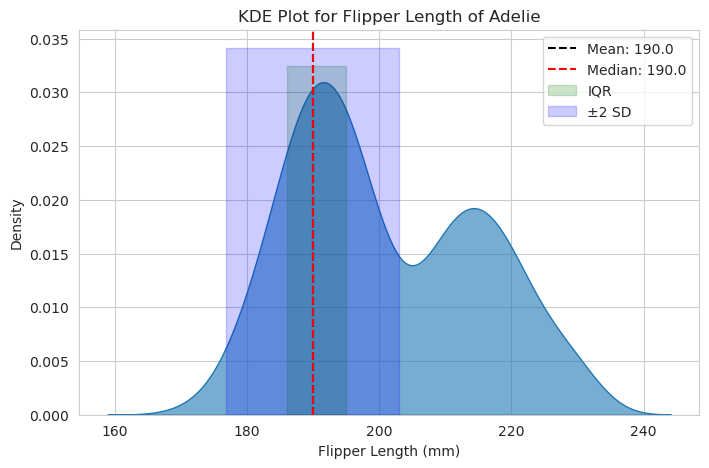

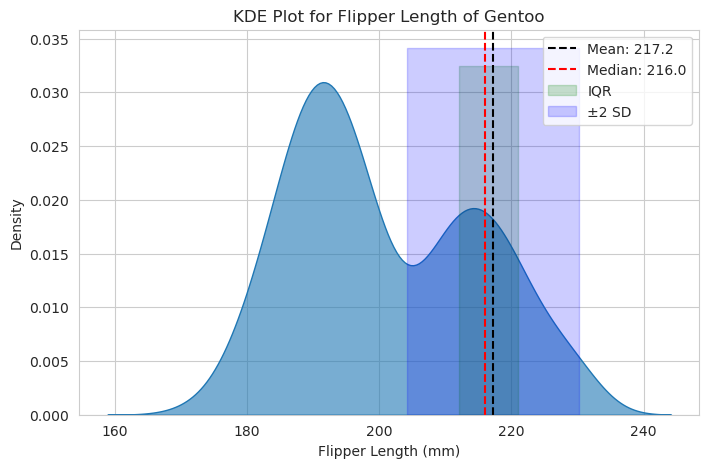

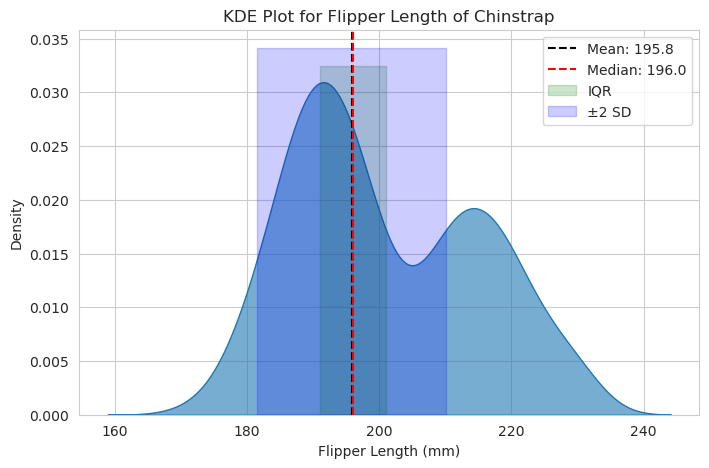

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the penguins dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Group by species and calculate means, medians, and standard deviations
pingees_group = pingees.groupby('species')['flipper_length_mm']
mean_data = pingees_group.mean().reset_index()
median_data = pingees_group.median().reset_index()
std_data = pingees_group.std().reset_index()

# Get the species counts
pingees_count = pingees['species'].value_counts().reset_index()

# Loop through all three species (indices 0, 1, and 2)
for i in range(3):
    species = pingees_count['species'][i]
    filtered_data = pingees[pingees['species'] == species]

    # Create the KDE plot
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=pingees, x='flipper_length_mm', fill=True, alpha=0.6)
    sns.set_style("whitegrid")
    plt.title(f"KDE Plot for Flipper Length of {species}")
    plt.xlabel("Flipper Length (mm)")
    plt.ylabel("Density")

    # Calculate mean and median
    mean_value = mean_data[mean_data['species'] == species]['flipper_length_mm'].values[0]
    median_value = median_data[median_data['species'] == species]['flipper_length_mm'].values[0]

    # Add mean and median lines
    plt.axvline(mean_value, color='black', linestyle='--', label=f'Mean: {mean_value:.1f}')
    plt.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.1f}')

    # Calculate the IQR and standard deviation ranges
    q1 = pingees_group.quantile(0.25).loc[species]
    q3 = pingees_group.quantile(0.75).loc[species]
    std_value = std_data[std_data['species'] == species]['flipper_length_mm'].values[0]

    # Define ranges for standard deviations
    lower_std = mean_value - 2 * std_value
    upper_std = mean_value + 2 * std_value

    # Add shaded regions for IQR and standard deviation
    plt.fill_betweenx(y=[0, plt.ylim()[1]], x1=q1, x2=q3, color='green', alpha=0.2, label='IQR')
    plt.fill_betweenx(y=[0, plt.ylim()[1]], x1=lower_std, x2=upper_std, color='blue', alpha=0.2, label='±2 SD')

    # Add legend
    plt.legend()
    
    # Show the plot for the current species
    # Save the plot as a PNG file
    plt.show()

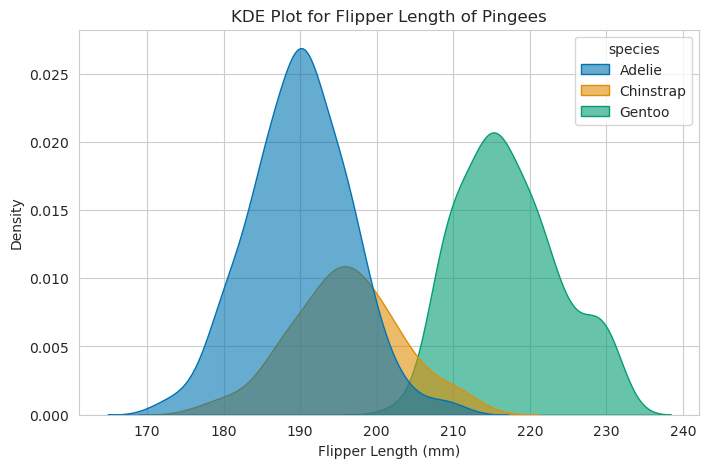

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the penguins dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Group by species and calculate means, medians, and standard deviations
pingees_group = pingees.groupby('species')['flipper_length_mm']
mean_data = pingees_group.mean().reset_index()
median_data = pingees_group.median().reset_index()
std_data = pingees_group.std().reset_index()

# Get the species counts
pingees_count = pingees['species'].value_counts().reset_index()

# Create the KDE plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data=pingees, x='flipper_length_mm', hue='species', fill=True, alpha=0.6, palette="colorblind")
sns.set_style("whitegrid")
plt.title(f"KDE Plot for Flipper Length of Pingees")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Density")

    
# Show the plot for the current species
plt.savefig('kde_plot.png', format='png')

Q3:
ChatGPT Log: https://chatgpt.com/share/66ef7aed-7a4c-8008-8279-45740a8ab340

I prefer the histogram. It keeps the details of each bin and is more accurate than a Kernel Density Estimator for each range of values. Although it does not show the "summary statistics" like a box plot (ie comparing IQR, +-2 standard deviation), you can easily see the distribution from the raw data. Unlike the box plot, you are able to see the sample size which is definitely very important to know. Therefore, I think for most cases, a histogram will be most useful to represent data.

Q4
1. A, C
2. A, B or B, C
3. B, D
4. A, D or C, D

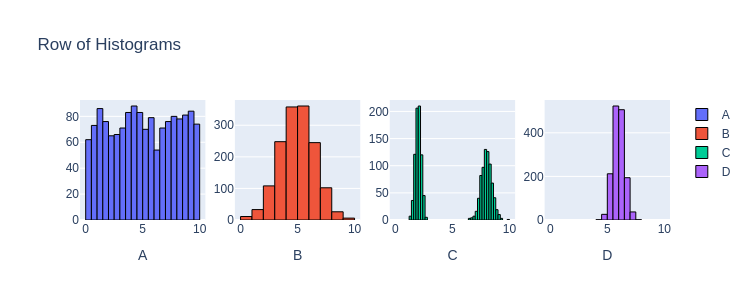

In [118]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Q5
ChatGPT log: https://chatgpt.com/share/66f32601-0fe0-8008-9e7f-512378d72f68

In [119]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

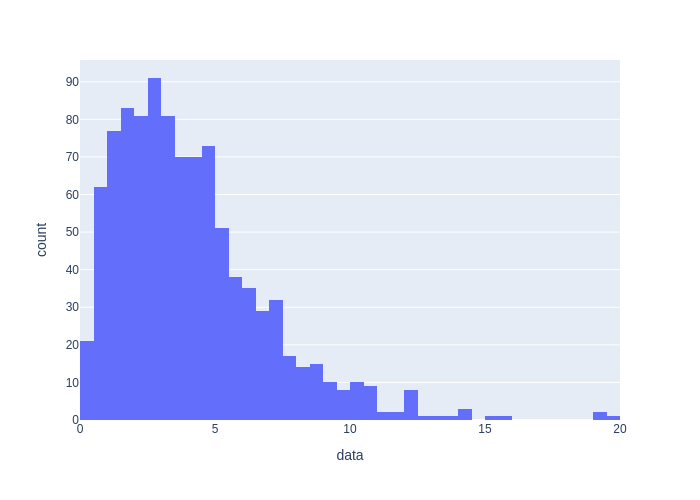

In [53]:
fig1.show(renderer="png")

In [95]:
mean_value = sample1.mean()
median_value = np.quantile(sample1, [0.5])

print(f"Mean: {mean_value}, Median: {median_value}")

Mean: 4.018136498445708, Median: [3.4259936]


Right Skewed: The mean is always going to be greater than the median. If a dataset is right skewed, this means that the mean value will be towards the middle as there is a greater count towards the left side but fewer on the right. Since we have more values on the left side, the median will be towards the left side, which causes the mean greater than the median.

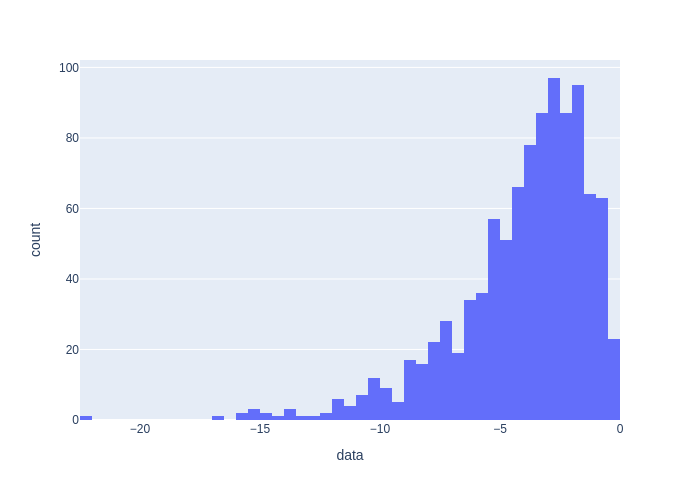

In [51]:
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")

In [97]:
mean_value_sample2 = sample2.mean()
median_value_sample2 = np.quantile(sample2, [0.5])

print(f"Mean of sample2: {mean_value_sample2}, Median of sample2: {median_value_sample2}")


Mean of sample2: -4.060916287448142, Median of sample2: [-3.45074299]


Left Skewed: The mean is always going to be less than the median. If a dataset is left skewed, this means that the mean value will be towards the middle as there is a greater count towards the right side but fewer on the left. Since we have more values on the right side, the median will be towards the right side, which causes the mean less than the median.

Q6: https://chatgpt.com/share/66f339de-cca8-8008-968c-cbfe9cabd025

In [99]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-03-19/mutant_moneyball.csv')
df # df.columns

,Member,TotalIssues,TotalIssues60s,TotalIssues70s,TotalIssues80s,TotalIssues90s,totalIssueCheck,TotalValue_heritage,TotalValue60s_heritage,TotalValue70s_heritage,...,TotalValue80s_oStreet,TotalValue90s_oStreet,PPI60s_wiz,PPI70s_wiz,PPI80s_wiz,PPI90s_wiz,PPI60s_oStreet,PPI70s_oStreet,PPI80s_oStreet,PPI90s_oStreet
0,warrenWorthington,139,61,35,20,23,139,1108558,929056,154585,...,$975.00,$123.00,$129.72,$31.57,$11.30,$2.86,"$1,117.38",$210.29,$48.75,$5.35
1,hankMcCoy,119,62,38,9,10,119,957993,929776,20705,...,$431.00,$81.00,$128.27,$22.39,$9.89,$3.85,"$1,103.06",$138.42,$47.89,$8.10
2,scottSummers,197,63,69,56,9,197,1152230,933616,188635,...,"$1,427.00",$74.00,$126.87,$28.68,$7.82,$4.36,"$1,088.73",$169.20,$25.48,$8.22
3,bobbyDrake,123,62,35,6,20,123,1086749,929776,154585,...,$137.00,$108.00,$128.27,$31.57,$8.00,$3.10,"$1,103.06",$210.29,$22.83,$5.40
4,jeanGrey,164,63,58,14,29,164,1132091,933616,179899,...,$822.00,$189.00,$126.87,$28.95,$11.79,$3.72,"$1,088.73",$176.98,$58.71,$6.52
5,alexSummers,68,8,13,43,4,68,189014,34519,144946,...,$502.00,$24.00,$42.75,$45.92,$5.88,$4.75,$231.25,$297.31,$11.67,$6.00
6,lornaDane,48,9,13,19,7,48,228558,76279,144946,...,$293.00,$44.00,$41.56,$45.92,$6.11,$6.14,$222.22,$297.31,$15.42,$6.29
7,ororoMunroe,190,0,36,121,33,190,227438,0,171050,...,"$2,391.00",$273.00,$0.00,$34.00,$7.69,$4.79,$0.00,$191.39,$19.76,$8.27
8,kurtWagner,120,0,36,84,0,120,221716,0,171050,...,"$2,044.00",$0.00,$0.00,$34.00,$8.76,$0.00,$0.00,$191.39,$24.33,$0.00
9,loganHowlett,167,0,36,115,16,167,224653,0,171050,...,"$2,310.00",$119.00,$0.00,$34.00,$7.90,$6.94,$0.00,$191.39,$20.09,$7.44


In [101]:
df.columns

Index(['Member', 'TotalIssues', 'TotalIssues60s', 'TotalIssues70s',
       'TotalIssues80s', 'TotalIssues90s', 'totalIssueCheck',
       'TotalValue_heritage', 'TotalValue60s_heritage',
       'TotalValue70s_heritage', 'TotalValue80s_heritage',
       'TotalValue90s_heritage', 'TotalValue_ebay', 'TotalValue60s_ebay',
       'TotalValue70s_ebay', 'TotalValue80s_ebay', 'TotalValue90s_ebay',
       '60s_Appearance_Percent', '70s_Appearance_Percent',
       '80s_Appearance_Percent', '90s_Appearance_Percent', 'PPI60s_heritage',
       'PPI70s_heritage', 'PPI80s_heritage', 'PPI90s_heritage', 'PPI60s_ebay',
       'PPI70s_ebay', 'PPI80s_ebay', 'PPI90s_ebay', 'TotalValue60s_wiz',
       'TotalValue70s_wiz', 'TotalValue80s_wiz', 'TotalValue90s_wiz',
       'TotalValue60s_oStreet', 'TotalValue70s_oStreet',
       'TotalValue80s_oStreet', 'TotalValue90s_oStreet', 'PPI60s_wiz',
       'PPI70s_wiz', 'PPI80s_wiz', 'PPI90s_wiz', 'PPI60s_oStreet',
       'PPI70s_oStreet', 'PPI80s_oStreet', 'PPI90s_oSt

In [103]:
df.describe()

,TotalIssues,TotalIssues60s,TotalIssues70s,TotalIssues80s,TotalIssues90s,totalIssueCheck,TotalValue_heritage,TotalValue60s_heritage,TotalValue70s_heritage,TotalValue80s_heritage,TotalValue90s_heritage,TotalValue_ebay,TotalValue60s_ebay,TotalValue70s_ebay,TotalValue80s_ebay,TotalValue90s_ebay
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,2.600000e+01,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,85.269231,14.884615,19.500000,38.153846,12.730769,85.269231,3.453620e+05,238781.115385,88249.653846,17532.653846,798.538462,8816.769231,6037.576923,2120.461538,575.769231,82.961538
std,62.429197,24.876217,21.414481,37.645390,9.958143,62.429197,4.307470e+05,393596.860996,82279.044260,19145.703405,643.805016,11036.283963,9989.311617,2025.885352,544.030463,82.831627
min,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.290000e+02,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,9.000000,3.250000,36.000000,8.248000e+03,0.000000,0.000000,1975.750000,202.500000,564.750000,0.000000,0.000000,138.750000,16.500000
50%,70.500000,0.000000,10.000000,21.500000,12.000000,70.500000,2.045345e+05,0.000000,140126.000000,8341.500000,806.500000,4205.500000,0.000000,2479.500000,447.500000,82.000000
75%,135.000000,12.000000,36.000000,59.750000,19.500000,135.000000,5.096355e+05,456270.250000,169861.750000,27919.250000,1076.250000,13910.750000,12270.750000,4349.000000,888.500000,99.250000
max,197.000000,63.000000,69.000000,121.000000,33.000000,197.000000,1.152230e+06,933616.000000,188635.000000,54205.000000,2183.000000,29964.000000,23420.000000,5431.000000,1730.000000,334.000000


In [129]:
df

,Member,TotalIssues,TotalIssues60s,TotalIssues70s,TotalIssues80s,TotalIssues90s,totalIssueCheck,TotalValue_heritage,TotalValue60s_heritage,TotalValue70s_heritage,...,TotalValue80s_oStreet,TotalValue90s_oStreet,PPI60s_wiz,PPI70s_wiz,PPI80s_wiz,PPI90s_wiz,PPI60s_oStreet,PPI70s_oStreet,PPI80s_oStreet,PPI90s_oStreet
0,warrenWorthington,139,61,35,20,23,139,1108558,929056,154585,...,$975.00,$123.00,$129.72,$31.57,$11.30,$2.86,"$1,117.38",$210.29,$48.75,$5.35
1,hankMcCoy,119,62,38,9,10,119,957993,929776,20705,...,$431.00,$81.00,$128.27,$22.39,$9.89,$3.85,"$1,103.06",$138.42,$47.89,$8.10
2,scottSummers,197,63,69,56,9,197,1152230,933616,188635,...,"$1,427.00",$74.00,$126.87,$28.68,$7.82,$4.36,"$1,088.73",$169.20,$25.48,$8.22
3,bobbyDrake,123,62,35,6,20,123,1086749,929776,154585,...,$137.00,$108.00,$128.27,$31.57,$8.00,$3.10,"$1,103.06",$210.29,$22.83,$5.40
4,jeanGrey,164,63,58,14,29,164,1132091,933616,179899,...,$822.00,$189.00,$126.87,$28.95,$11.79,$3.72,"$1,088.73",$176.98,$58.71,$6.52
5,alexSummers,68,8,13,43,4,68,189014,34519,144946,...,$502.00,$24.00,$42.75,$45.92,$5.88,$4.75,$231.25,$297.31,$11.67,$6.00
6,lornaDane,48,9,13,19,7,48,228558,76279,144946,...,$293.00,$44.00,$41.56,$45.92,$6.11,$6.14,$222.22,$297.31,$15.42,$6.29
7,ororoMunroe,190,0,36,121,33,190,227438,0,171050,...,"$2,391.00",$273.00,$0.00,$34.00,$7.69,$4.79,$0.00,$191.39,$19.76,$8.27
8,kurtWagner,120,0,36,84,0,120,221716,0,171050,...,"$2,044.00",$0.00,$0.00,$34.00,$8.76,$0.00,$0.00,$191.39,$24.33,$0.00
9,loganHowlett,167,0,36,115,16,167,224653,0,171050,...,"$2,310.00",$119.00,$0.00,$34.00,$7.90,$6.94,$0.00,$191.39,$20.09,$7.44


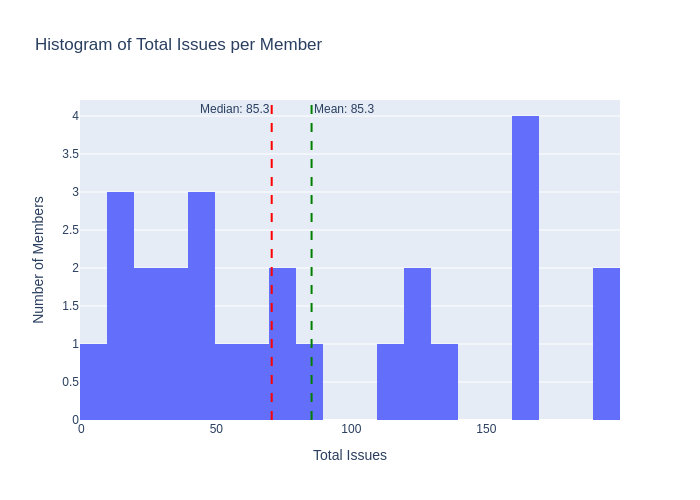

In [180]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-03-19/mutant_moneyball.csv')

# Create a new DataFrame that counts TotalIssues by Member
count_df = df.groupby('Member')['TotalIssues'].sum().reset_index()

# Create a histogram of the total issues per member
fig = px.histogram(
    count_df,
    x="TotalIssues",
    title="Histogram of Total Issues per Member",
    labels={"TotalIssues": "Total Issues"},
    nbins=20
)

# Change yaxis label
fig.update_layout(
    yaxis_title="Number of Members" 
)

fig.add_vline(x=count_df['TotalIssues'].mean(), 
               line_dash="dash", 
               line_color="green", 
               annotation_text=f'Mean: {mean_value:.1f}', 
               annotation_position="top right")


fig.add_vline(x=count_df['TotalIssues'].median(), 
               line_dash="dash", 
               line_color="red", 
               annotation_text=f'Median: {mean_value:.1f}', 
               annotation_position="top left")

fig.show(renderer="png")


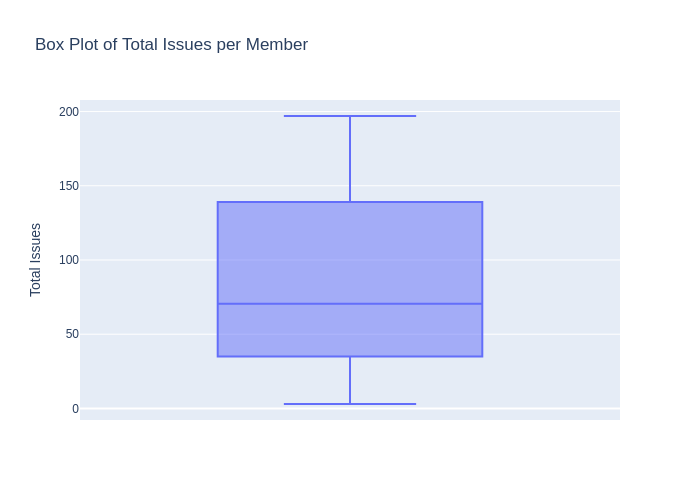

In [176]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-03-19/mutant_moneyball.csv')

# Create a new DataFrame that counts TotalIssues by Member
count_df = df.groupby('Member')['TotalIssues'].sum().reset_index()

# Create a box plot of the total issues per member
fig = px.box(
    count_df,
    y="TotalIssues",  # Box plot uses y for the variable of interest
    title="Box Plot of Total Issues per Member",
    labels={"TotalIssues": "Total Issues"}
)

# Change y-axis label
fig.update_layout(
    yaxis_title="Total Issues"  # Set y-axis label
)

# Show the plot
fig.show(renderer="png")


1. Looking at the histogram, there seems to be quite a few characters that are not as prominent.
2. Seems to be a multimodal distribution
3. The box plot shows us that, obviously, there is a large spread of data. However, most characters show up within 50-150 issues.
4. There could possible be some right skew as Median < Mean
5. Bin size 20 was possibly chosen to group the data so there are fewer gaps between bins (ie bins with no data).

7.

In [12]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

8.

9. No. Planning to though...